In [35]:
import matplotlib.pyplot as plt

import numpy as np

import os
import sys

import yaml

import PhyPraKit as ppk

import pandas as pd
notebook_path = os.path.abspath('')
project_root = os.path.dirname(notebook_path)
sys.path.append(project_root)

#from modules.analyzers import *
#from helpers.read_tar_parquet_to_df import process_parquet_files_from_tar

colors ={'ch1':'tab:blue','ch2':'tab:orange'}

#print(sys.path)


In [42]:
hist_pv_ch1 = np.loadtxt('./3_7_hist/ch1_Ge.hst')
hist_pv_ch2 = np.loadtxt('./3_7_hist/ch2_Na.hst')

hist_pv_ch1 = hist_pv_ch1
hist_pv_ch2 = hist_pv_ch2


max_channel=len(hist_pv_ch1)

bins=np.linspace(0,max_channel-1,max_channel)
bins_np=np.linspace(0,max_channel,max_channel+1)


hist_my_ch1, bins_my_ch1 = np.histogram(pd.read_csv('analyzed_pulses/ch1_pulses_pvlike.txt',delimiter='	')['ch1_height'],bins=bins_np)
hist_my_ch2, bins_my_ch2 = np.histogram(-pd.read_csv('analyzed_pulses/ch2_minimum.txt',delimiter='	')['ch2_height'],bins=bins_np)

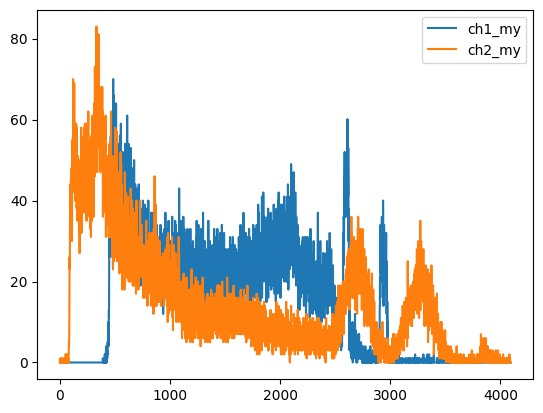

In [46]:
plt.plot(bins, hist_my_ch1, label='ch1_my', color=colors['ch1'])
plt.plot(bins, hist_my_ch2, label='ch2_my', color=colors['ch2'])
plt.legend()
plt.show()

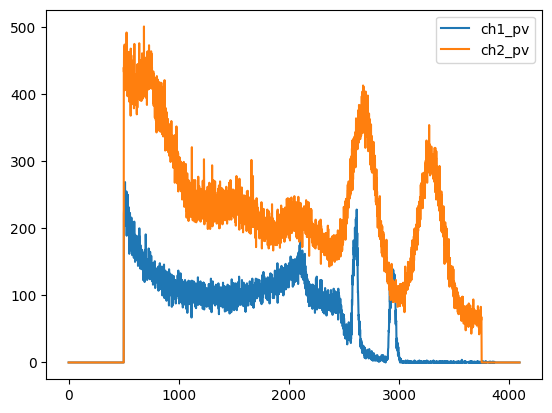

In [47]:
plt.plot(bins, hist_pv_ch1, label='ch1_pv', color=colors['ch1'])
plt.plot(bins, hist_pv_ch2, label='ch2_pv', color=colors['ch2'])
plt.legend()
plt.show()

#fullwidth half maximum vergleichen


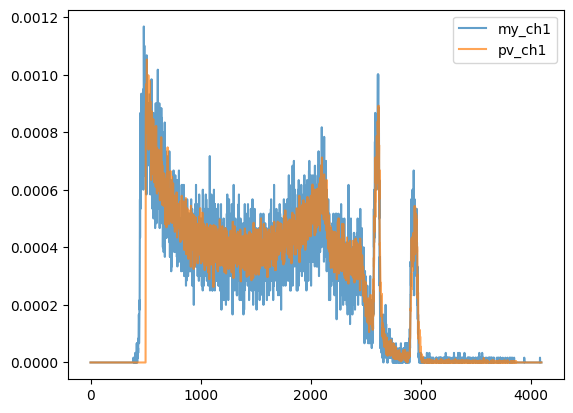

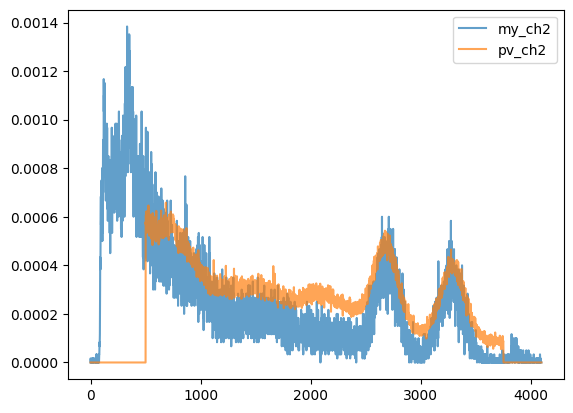

In [49]:
plt.plot(bins,hist_my_ch1/np.sum(hist_my_ch1),alpha=.7,label="my_ch1")
plt.plot(bins,hist_pv_ch1/np.sum(hist_pv_ch1),alpha=.7,label="pv_ch1")
plt.legend()
plt.show()

plt.plot(bins,hist_my_ch2/np.sum(hist_my_ch2),alpha=.7,label="my_ch2")
plt.plot(bins,hist_pv_ch2/np.sum(hist_pv_ch2),alpha=.7,label="pv_ch2")
plt.legend()
plt.show()


# Ergebnis der Analyse

Pavel und meine Analyse ergibt ein ähnliches Spektrum mit ungefähr gleicher Auflösung.

Komischerweise musste ich auf ch2 das minimum des undershoots verwenden (np.min(data)), evtl kann der Untergrund verringert werden, wenn auch hier ein Peakfinder verwendet wird bzw. optimalerweise natürlich der Peak selber und nicht der undershoot.




<Axes: >

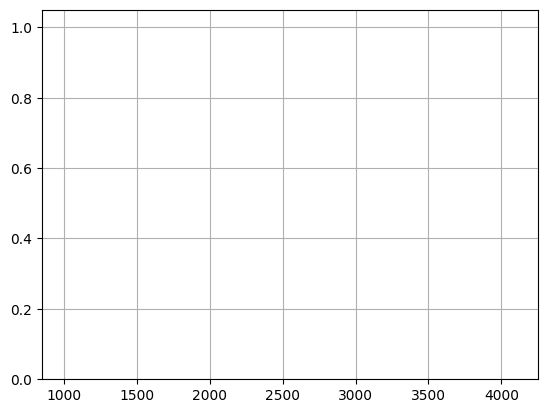

In [67]:
coinc = pd.read_csv('analyzed_pulses/coincidences.txt',delimiter='	')
coinc.ch2_height=coinc.ch2_height.abs()
coinc.ch2_height.hist(bins=bins[1000:])